### PROJECT TITLE: FLIGHT DELAY PREDICTION

In [1]:
### import necessary libraries

# For data analysis
import pandas as pd
import numpy as np

In [2]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
#Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
# Ipip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load the dataset
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\Resources\10Alytics Data Science\10ALYTICS DS Internship\flights dataset.csv")

In [9]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(1048575, 31)

In [11]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [12]:
# Data verification - Data type, number of features and rows, missing data, e.t.c
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [13]:
df.drop(['YEAR', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ],axis=1, inplace=True)

In [14]:
# Dealing with missing values
df.isna().sum()

MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
dtype: int64

In [15]:
df['DEPARTURE_TIME'].fillna(df['DEPARTURE_TIME'].mean(), inplace=True)
df['DEPARTURE_DELAY'].fillna(df['DEPARTURE_DELAY'].mean(), inplace=True)
df['TAXI_OUT'].fillna(df['TAXI_OUT'].mean(), inplace=True)
df['TAXI_IN'].fillna(df['TAXI_IN'].mean(), inplace=True)
df['ARRIVAL_TIME'].fillna(df['ARRIVAL_TIME'].mean(), inplace=True)
df['ARRIVAL_DELAY'].fillna(df['ARRIVAL_DELAY'].mean(), inplace=True)
df['WHEELS_ON'].fillna(df['WHEELS_ON'].mean(), inplace=True)
df['AIR_TIME'].fillna(df['AIR_TIME'].mean(), inplace=True)
df['ELAPSED_TIME'].fillna(df['ELAPSED_TIME'].mean(), inplace=True)
df['SCHEDULED_TIME'].fillna(df['SCHEDULED_TIME'].mean(), inplace=True)
df['WHEELS_OFF'].fillna(df['WHEELS_OFF'].mean(), inplace=True)
df['CANCELLATION_REASON'].fillna(df['CANCELLATION_REASON'].mode()[0], inplace=True)

In [16]:
df.isna().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

In [17]:
df.AIRLINE.unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

In [18]:
df['AIRLINE'].replace({
    'UA': 'United Air Lines Inc.',
    'AA': 'American Airlines Inc.',
    'US': 'US Airways Inc.',
    'F9': 'Frontier Airlines Inc.',
    'B6': 'JetBlue Airways',
    'OO': 'Skywest Airlines Inc.',
    'AS': 'Alaska Airlines Inc.',
    'NK': 'Spirit Air Lines',
    'WN': 'Southwest Airlines Co.',
    'DL': 'Delta Air Lines Inc.',
    'EV': 'Atlantic Southeast Airlines',
    'HA': 'Hawaiian Airlines Inc.',
    'MQ': 'American Eagle Airlines Inc.',
    'VX': 'Virgin America'
}, inplace=True)

In [19]:
df.AIRLINE.nunique()

14

In [20]:
df.AIRLINE.value_counts()

Southwest Airlines Co.          221586
Delta Air Lines Inc.            147486
Atlantic Southeast Airlines     111206
Skywest Airlines Inc.           107099
American Airlines Inc.           97549
United Air Lines Inc.            87606
US Airways Inc.                  73942
American Eagle Airlines Inc.     65513
JetBlue Airways                  48157
Alaska Airlines Inc.             29614
Spirit Air Lines                 19612
Frontier Airlines Inc.           14669
Hawaiian Airlines Inc.           14133
Virgin America                   10403
Name: AIRLINE, dtype: int64

In [21]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON
0,1,1,4,Alaska Airlines Inc.,ANC,SEA,5,2354.0,-11.0,21.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,B
1,1,1,4,American Airlines Inc.,LAX,PBI,10,2.0,-8.0,12.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,B
2,1,1,4,US Airways Inc.,SFO,CLT,20,18.0,-2.0,16.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,B
3,1,1,4,American Airlines Inc.,LAX,MIA,20,15.0,-5.0,15.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,B
4,1,1,4,Alaska Airlines Inc.,SEA,ANC,25,24.0,-1.0,11.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,B


In [22]:
airports = pd.read_csv(r"C:\Users\ADMIN\Desktop\Resources\10Alytics Data Science\10ALYTICS DS Internship\airports.csv")
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [23]:
airports.shape

(322, 7)

In [24]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [25]:
airports.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [26]:
columns=airports.loc[:,['LATITUDE','LONGITUDE']]

In [27]:
airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [28]:
df.describe()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.694297e+00,1.382097e+01,3.953196e+00,1.322632e+03,1.333705e+03,1.133485e+01,1.665380e+01,1.357382e+03,1.402526e+02,1.369381e+02,1.127477e+02,8.034077e+02,1.485932e+03,7.549438e+00,1.504820e+03,1.492204e+03,7.612191e+00,2.426150e-03,3.864960e-02
std,7.051508e-01,8.725656e+00,1.999436e+00,4.707748e+02,4.735582e+02,3.847756e+01,9.875001e+00,4.736786e+02,7.463451e+01,7.241352e+01,7.037799e+01,5.942362e+02,4.933402e+02,6.226179e+00,4.865613e+02,4.970230e+02,4.122009e+01,4.919620e-02,1.927585e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,2.000000e+01,1.500000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.000000e+00,0.000000e+00
25%,1.000000e+00,6.000000e+00,2.000000e+00,9.200000e+02,9.390000e+02,-4.000000e+00,1.100000e+01,9.540000e+02,8.500000e+01,8.400000e+01,6.100000e+01,3.680000e+02,1.121000e+03,4.000000e+00,1.120000e+03,1.125000e+03,-1.200000e+01,0.000000e+00,0.000000e+00
50%,2.000000e+00,1.300000e+01,4.000000e+00,1.319000e+03,1.333705e+03,-1.000000e+00,1.400000e+01,1.357382e+03,1.220000e+02,1.230000e+02,9.800000e+01,6.410000e+02,1.485932e+03,6.000000e+00,1.524000e+03,1.501000e+03,-2.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.100000e+01,6.000000e+00,1.720000e+03,1.722000e+03,1.133485e+01,1.900000e+01,1.736000e+03,1.730000e+02,1.670000e+02,1.420000e+02,1.046000e+03,1.901000e+03,8.000000e+00,1.915000e+03,1.907000e+03,1.100000e+01,0.000000e+00,0.000000e+00
max,3.000000e+00,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,7.180000e+02,7.660000e+02,6.870000e+02,4.983000e+03,2.400000e+03,2.020000e+02,2.359000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00


In [29]:
df.describe(exclude=["int64", "float64"]).T

,count,unique,top,freq
AIRLINE,1048575,14,Southwest Airlines Co.,221586
ORIGIN_AIRPORT,1048575,315,ATL,66599
DESTINATION_AIRPORT,1048575,315,ATL,66741
CANCELLATION_REASON,1048575,4,B,1036308


In [30]:
# Check for duplicates
df.duplicated().sum()

0

### EDA

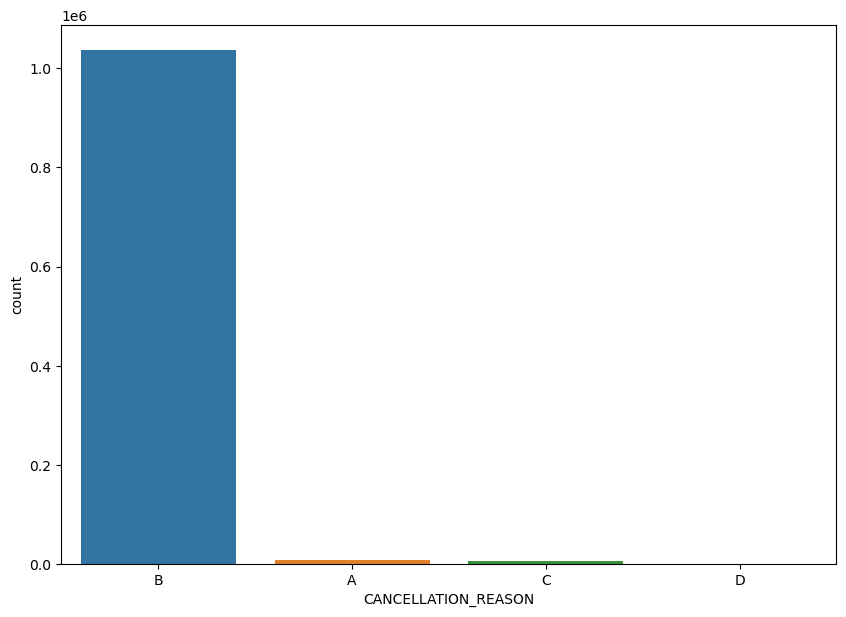

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
plt.figure(figsize=(10, 7))
sns.countplot(x='CANCELLATION_REASON', data=df)
plt.show()


### Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

We can observe from graph easily that mostly weather is responsible for delays of flight.



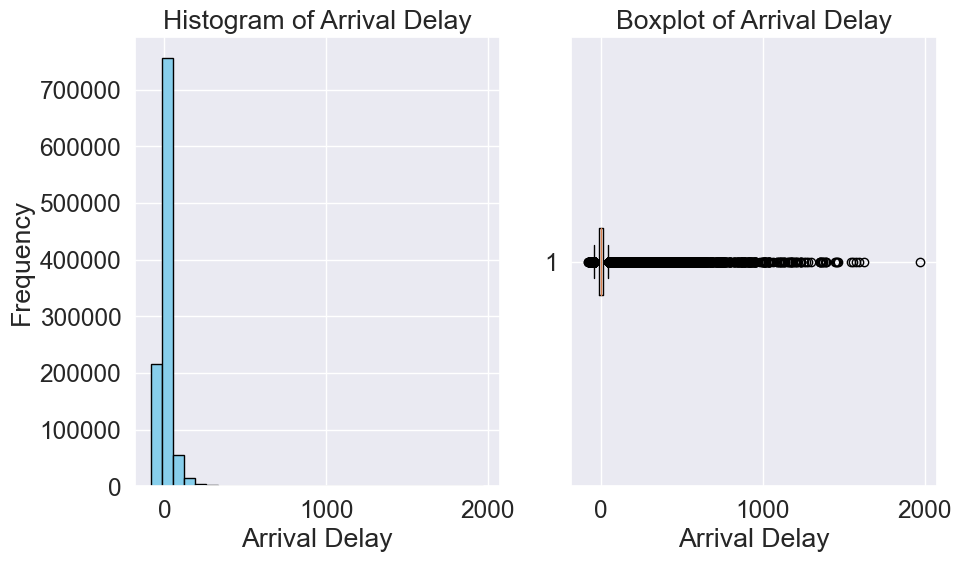

In [80]:
import matplotlib.pyplot as plt

# Create a histogram and boxplot for ARRIVAL_DELAY
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['ARRIVAL_DELAY'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Arrival Delay')
plt.xlabel('Arrival Delay')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['ARRIVAL_DELAY'], vert=False)
plt.title('Boxplot of Arrival Delay')
plt.xlabel('Arrival Delay')

plt.tight_layout()
plt.show()

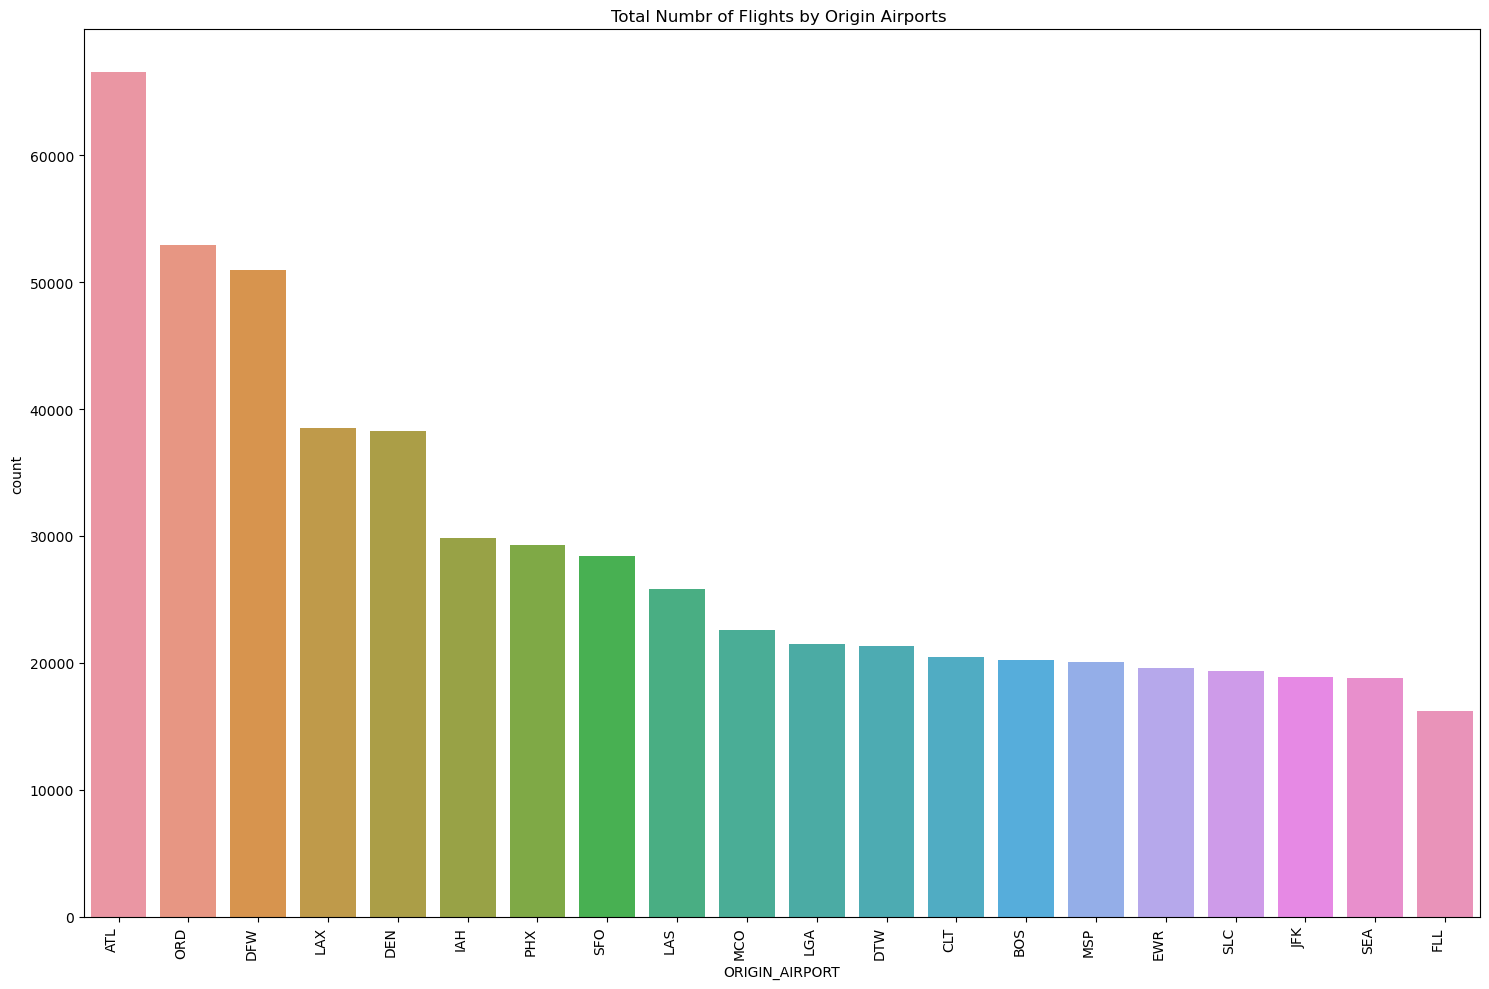

In [32]:
plt.figure(figsize=(15, 10))
axis = sns.countplot(x=df['ORIGIN_AIRPORT'], data =df, order=df['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
plt.title("Total Numbr of Flights by Origin Airports ")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [33]:
df.ORIGIN_AIRPORT.value_counts()

ATL    66599
ORD    52961
DFW    50933
LAX    38473
DEN    38254
       ...  
UST       33
BGR       22
PPG       21
ADK       20
ITH        6
Name: ORIGIN_AIRPORT, Length: 315, dtype: int64

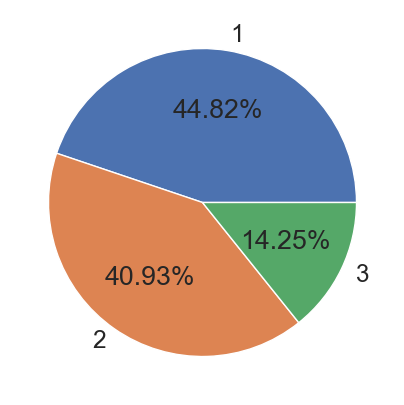

In [77]:
from collections import Counter
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
count = Counter(df['MONTH'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p: f'{p:.2f}%')
plt.show()

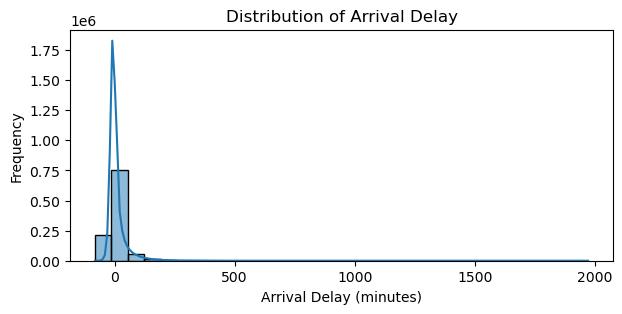

In [34]:
# Distribution of ARRIVAL_DELAY
plt.figure(figsize=(7, 3))
sns.histplot(df['ARRIVAL_DELAY'], bins=30, kde=True)
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()


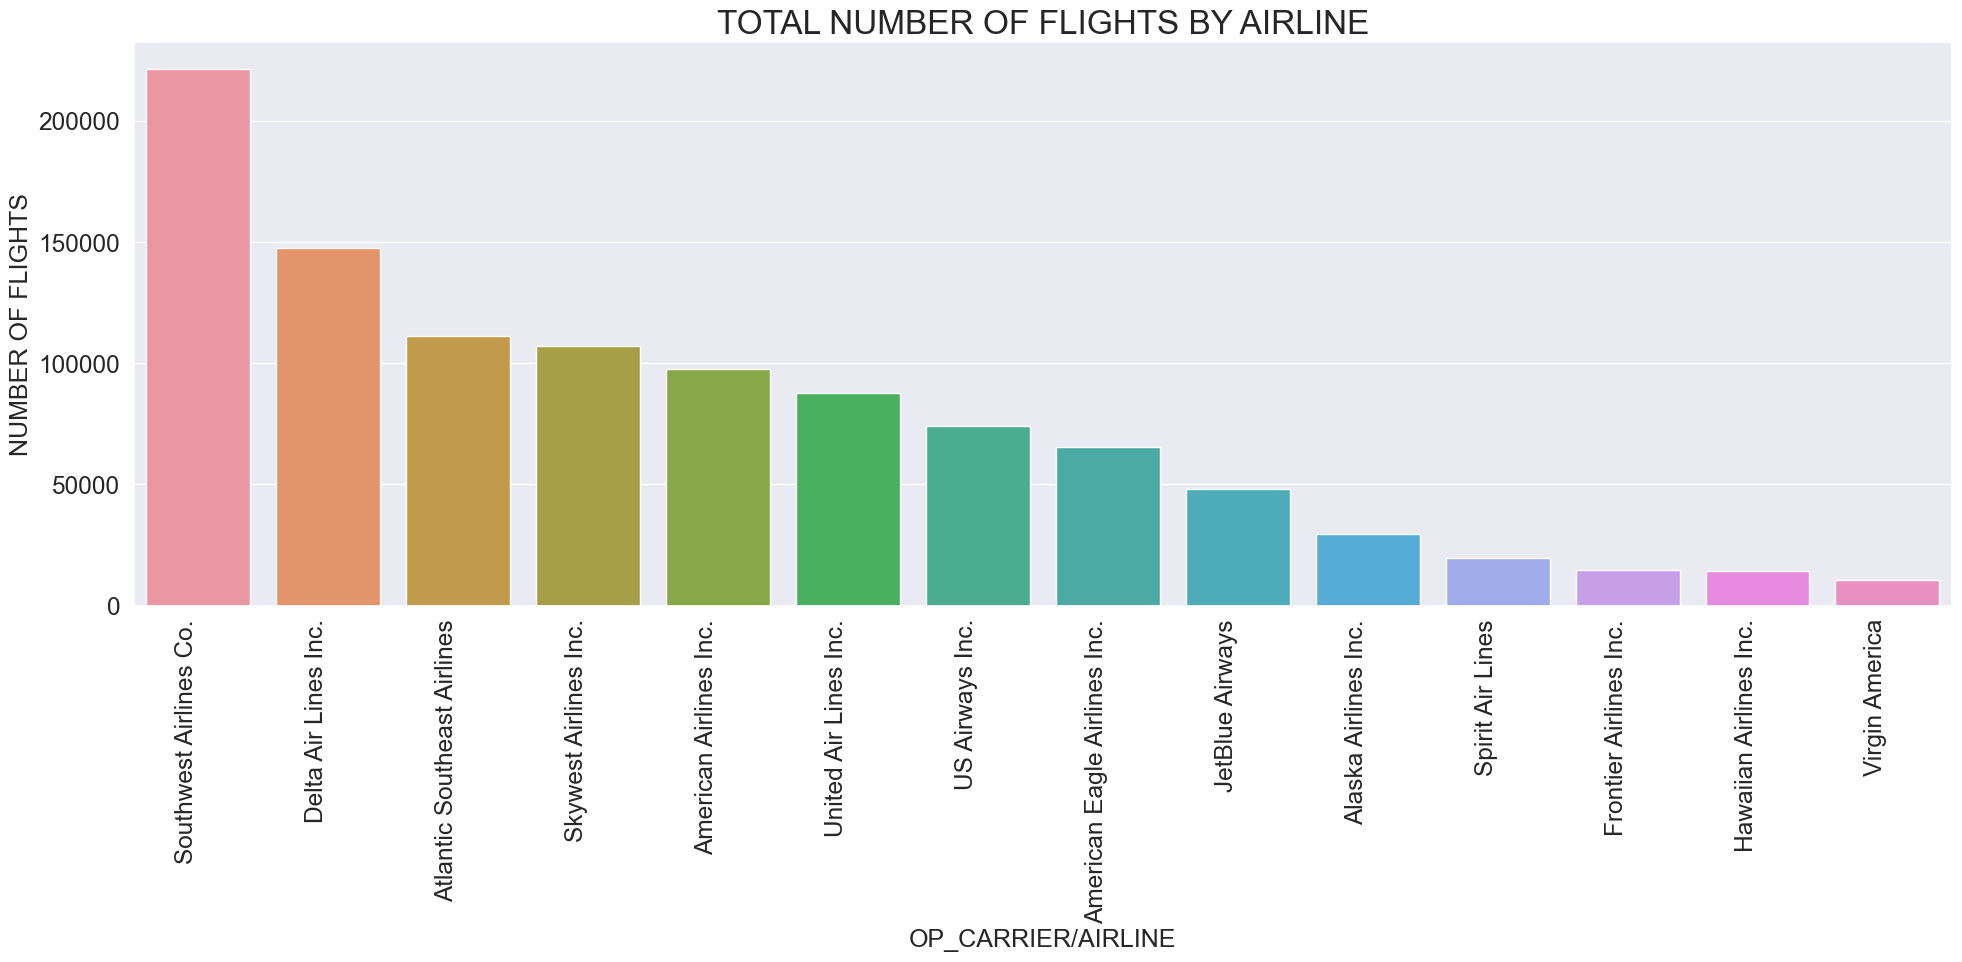

In [35]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['AIRLINE'], data=df, order=df['AIRLINE'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [36]:
df.AIRLINE.value_counts()

Southwest Airlines Co.          221586
Delta Air Lines Inc.            147486
Atlantic Southeast Airlines     111206
Skywest Airlines Inc.           107099
American Airlines Inc.           97549
United Air Lines Inc.            87606
US Airways Inc.                  73942
American Eagle Airlines Inc.     65513
JetBlue Airways                  48157
Alaska Airlines Inc.             29614
Spirit Air Lines                 19612
Frontier Airlines Inc.           14669
Hawaiian Airlines Inc.           14133
Virgin America                   10403
Name: AIRLINE, dtype: int64

####
From this plot we can now extract the top 5 airlines with the most delayed flights, which are:

1. Southwest Airlines
2. American Airlines
3. SkyWest Airlines
4. Delta Airlines
5. United Airlines

An airline that stands out of the pack is Republic Airways, they have the sixth largest number of flights, and they are ranked number 9 out of 18 in terms of delayed flights. I still have not calculated the percentage of delayed flights and the average delay time per airline, so lets get into that, as that might be a better representation of how the airlines really perform.

Percentage of delayed flights per airline
The first thing to calculate is the overall percentage of delayed flights so that we can do proper comparisons with each airline. In other words, airlines would want to be below the average percentage of delayed flights to be in an acceptable position, so that magic number will represent our threshold. Airlines above would be by common sense the ones that travelers would want to avoid as it means you those will have the most delays.

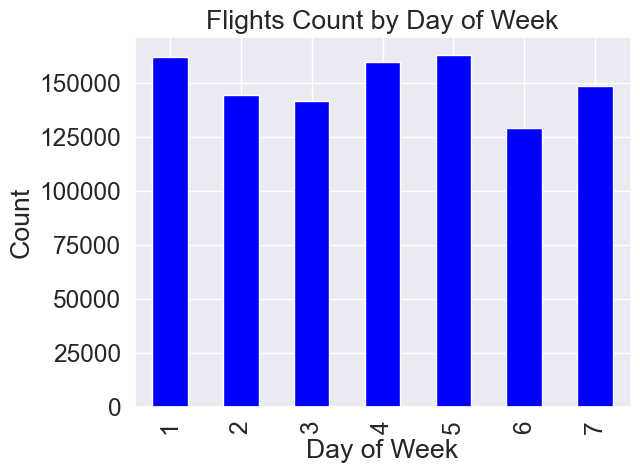

In [37]:
# Univariate Analysis - DAY_OF_WEEK

df['DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Flights Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

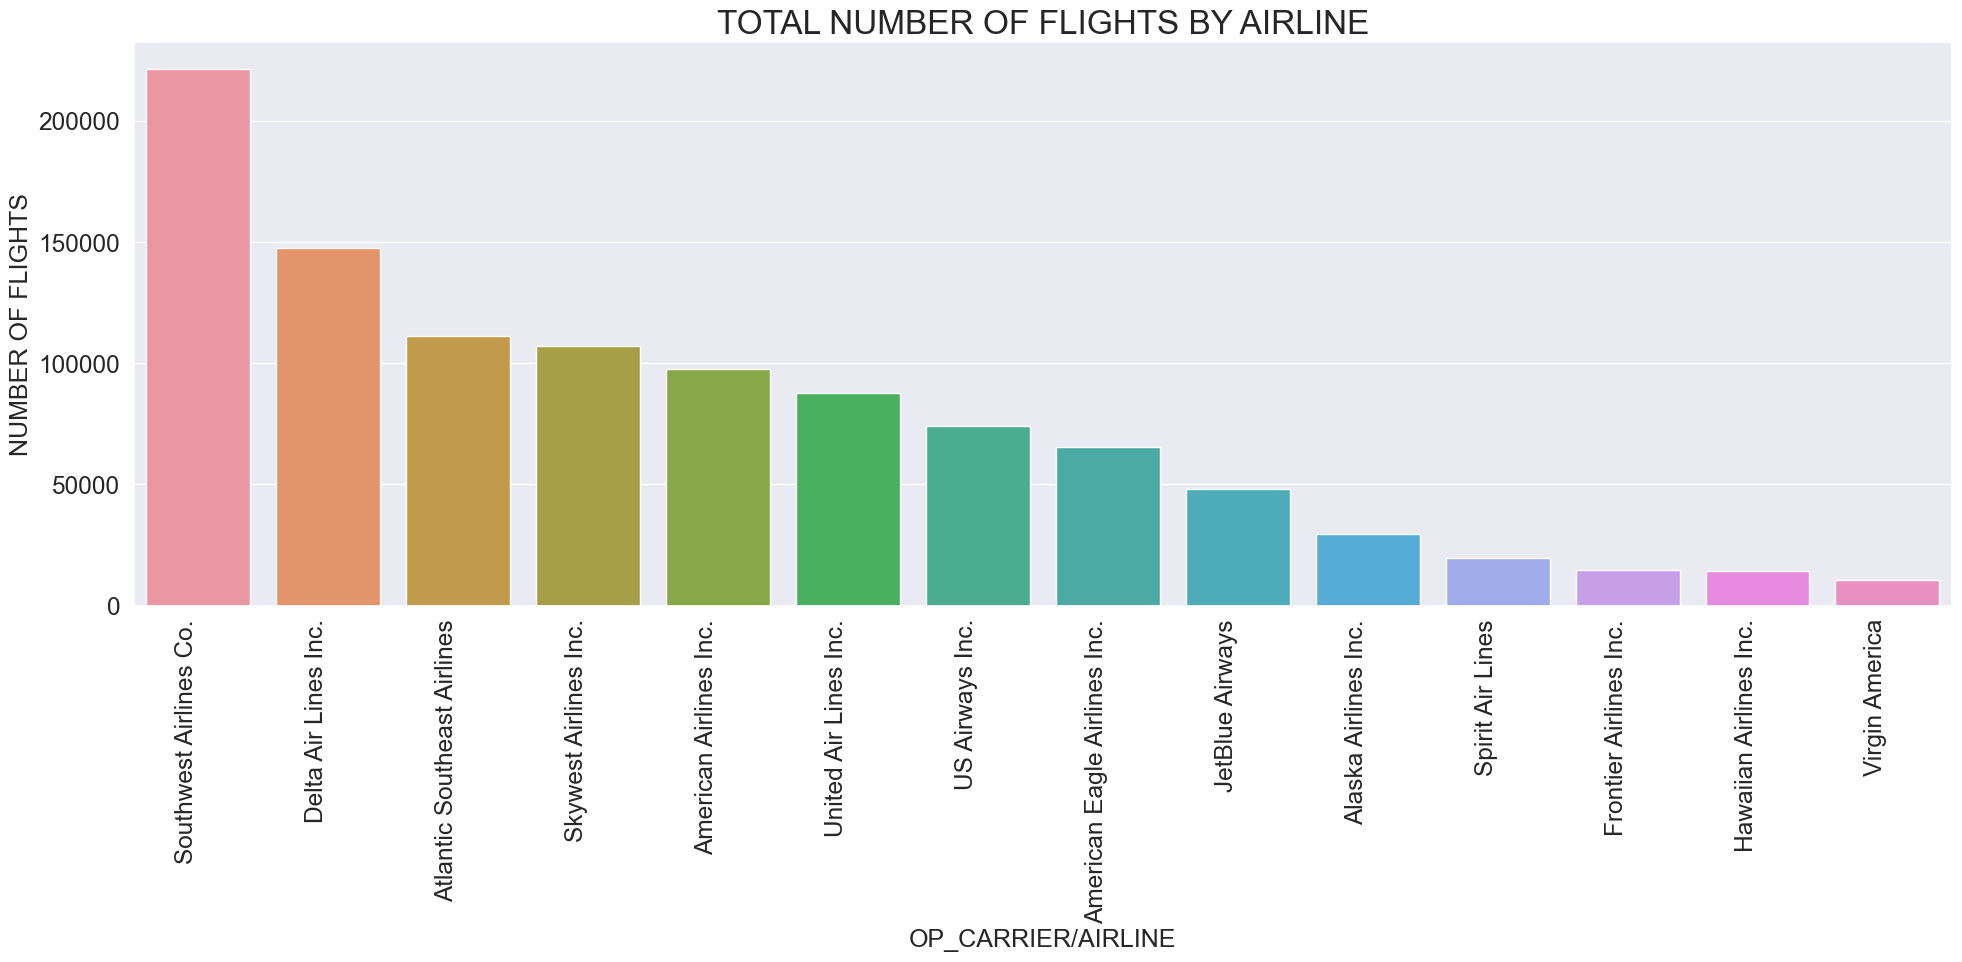

In [38]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['AIRLINE'], data=df, order=df['AIRLINE'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [39]:
import matplotlib as mpl

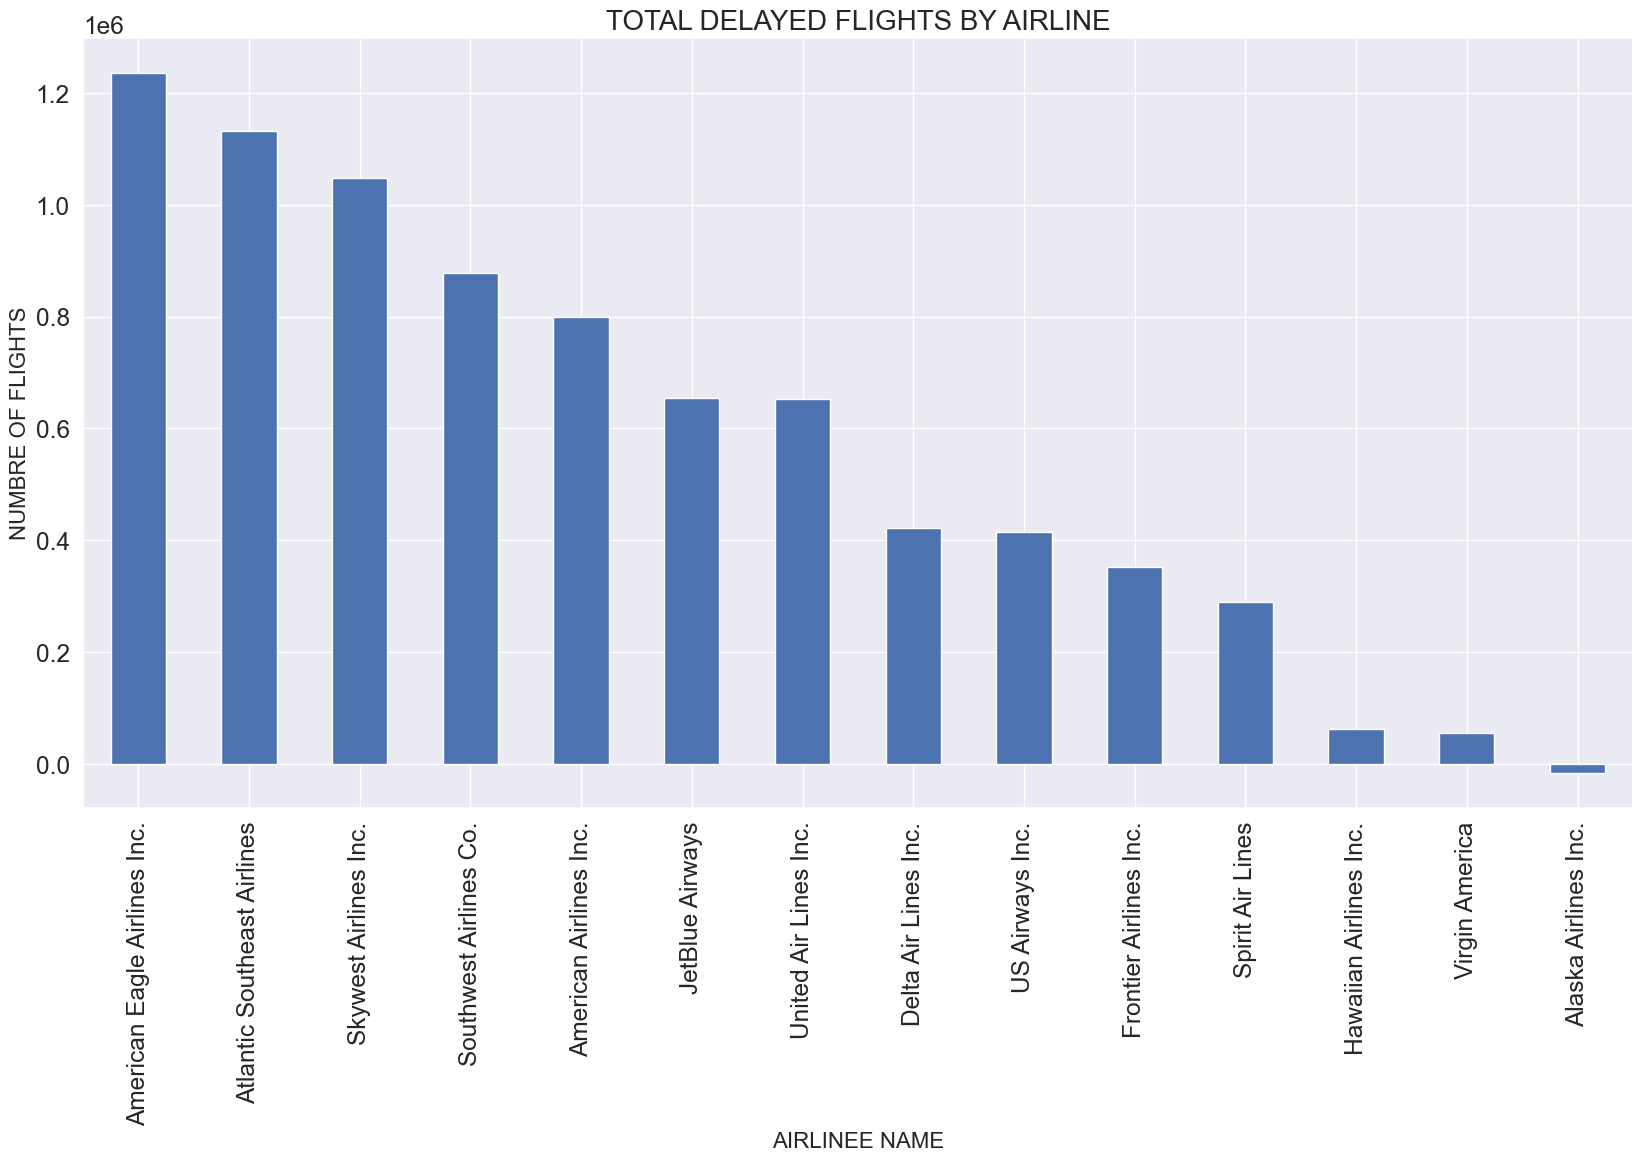

In [40]:
plt.figure(figsize=(20, 10))
df.groupby('AIRLINE').ARRIVAL_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

###
The airline with the most delays is American Eagle, while Alaska Airlines has the fewest delays. 

### Univariate Analysis:

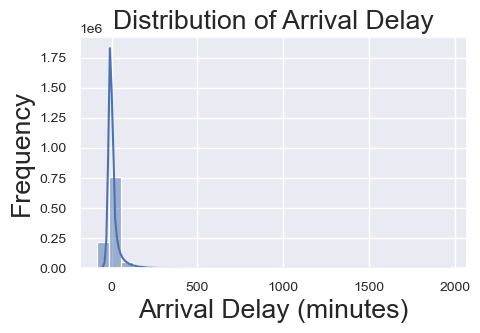

In [41]:
# Univariate Analysis - Arrival Delay Distribution
plt.figure(figsize=(5, 3))
sns.histplot(df['ARRIVAL_DELAY'], bins=30, kde=True)
plt.title("Distribution of Arrival Delay")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

###
The histogram is skewed to the right, it indicates that there are more flights with longerarrival delays.

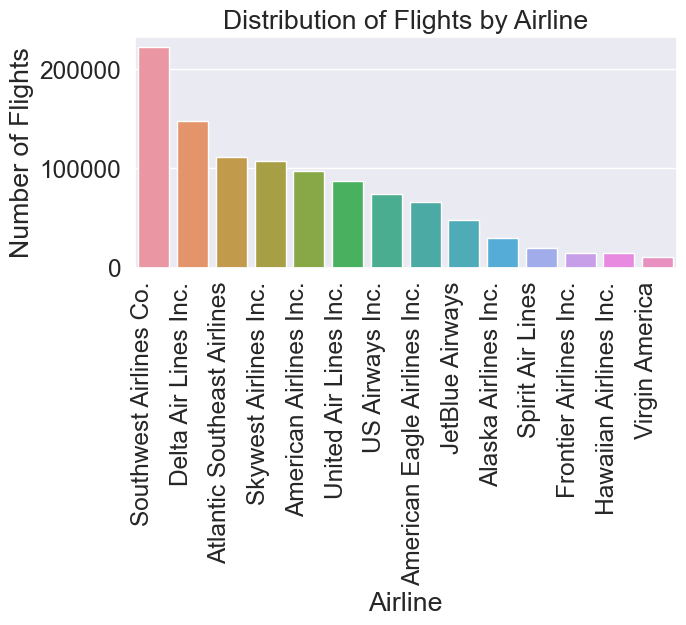

In [42]:
plt.figure(figsize=(7, 3))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['AIRLINE'], data=df, order=df['AIRLINE'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title("Distribution of Flights by Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.tight_layout()
plt.show()

# Univariate Analysis - Airline Distribution

#plt.figure(figsize=(20, 10))
#sns.countplot(x='AIRLINE', data=df)
#plt.title("Distribution of Flights by Airline")
#plt.xlabel("Airline")
#plt.ylabel("Number of Flights")
#plt.tight_layout()
#plt.show()

### Bivariate Analysis:
Bivariate analysis involves exploring the relationship between two variables.

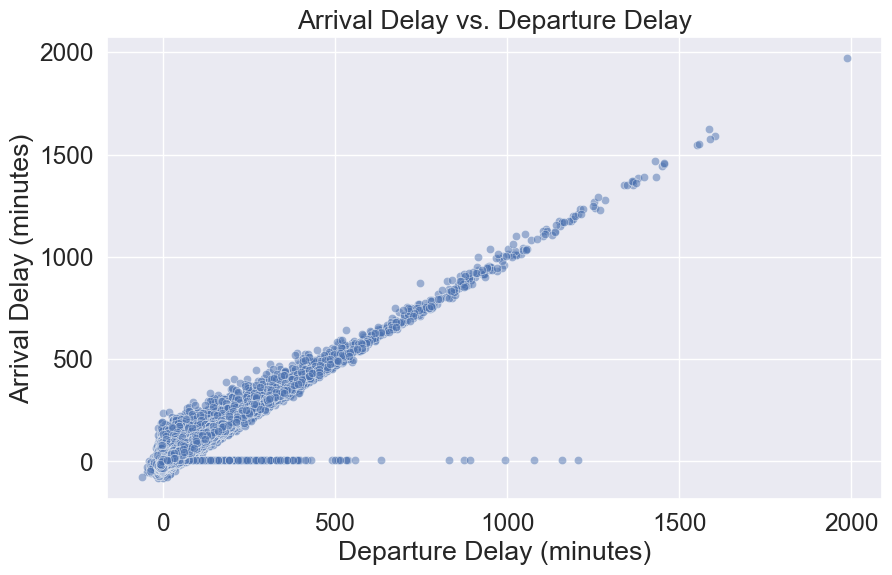

In [43]:
# Bivariate Analysis - Arrival Delay vs. Departure Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', data=df, alpha=0.5)
plt.title("Arrival Delay vs. Departure Delay")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()

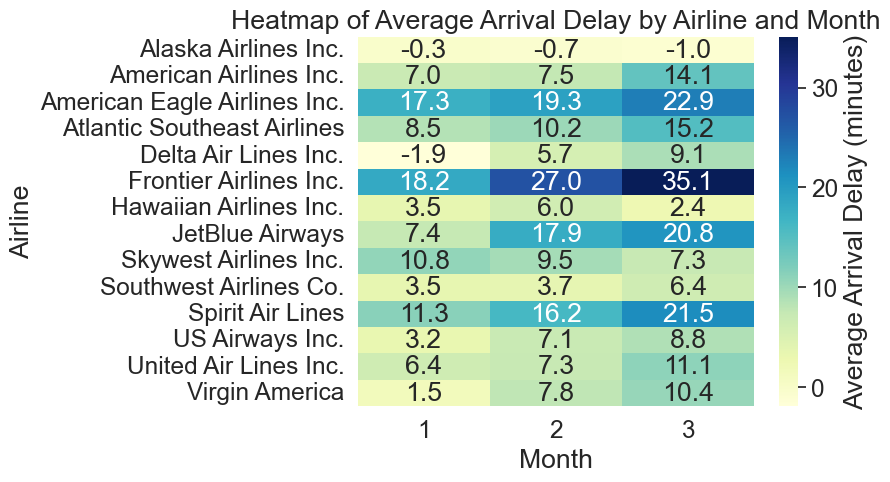

In [44]:
pivot_table = df.pivot_table(values='ARRIVAL_DELAY', index='AIRLINE', columns='MONTH', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Average Arrival Delay (minutes)'})
plt.title('Heatmap of Average Arrival Delay by Airline and Month')
plt.xlabel('Month')
plt.ylabel('Airline')
plt.show();

### Narration :
Average Airline that have delay by Month
January High Delay = 1 :[Frontier Airline Inc=18.2 minutes, American Eagle Alines Inc=17.3 minutes, Spirit Air lines= 11.3 minutes, Skywest Airlines Inc = 10.8 minutes]
January Low Delay = 1 : [Virgin America= 1.5 minutes, US Airways Inc=3.2 minutes]
     
Febuary High Delay= 2:[Frontier Airline Inc=27.0 minutes,American Eagle Alines Inc=19.3 minutes ,Jetblue Airways =17.9 minutes , Spirit Air Lines =16.2 minutes]
Febuary Low Dalay= 2: [Southwest Airlines co= 3.7 minutes,Delta Air Lines Inc=5.7 minutes]
     
March High Delay = 3 :[Frontier Airline Inc=35.1 minutes, American Eagle Alines Inc=22.9 minutes, Jetblue Airways =17.9 minutes] 
March Low Delay = 3 : [Hawaiian Airline Inc = 2.4 minutes]

Narration: 
The heatmap provides a comprehensive view of how average arrival delays vary across different airlines and months.
Darker cells represent months or airlines with higher average arrival delays, while lighter cells represent lower delays.
The annotations in each cell provide specific average delay values.
This visualization show the identification patterns, trends, or outliers in the average arrival delay data across both      airlines and months.

### Multivariate Analysis
Multivariate analysis involves exploring the relationship between three or more variables.

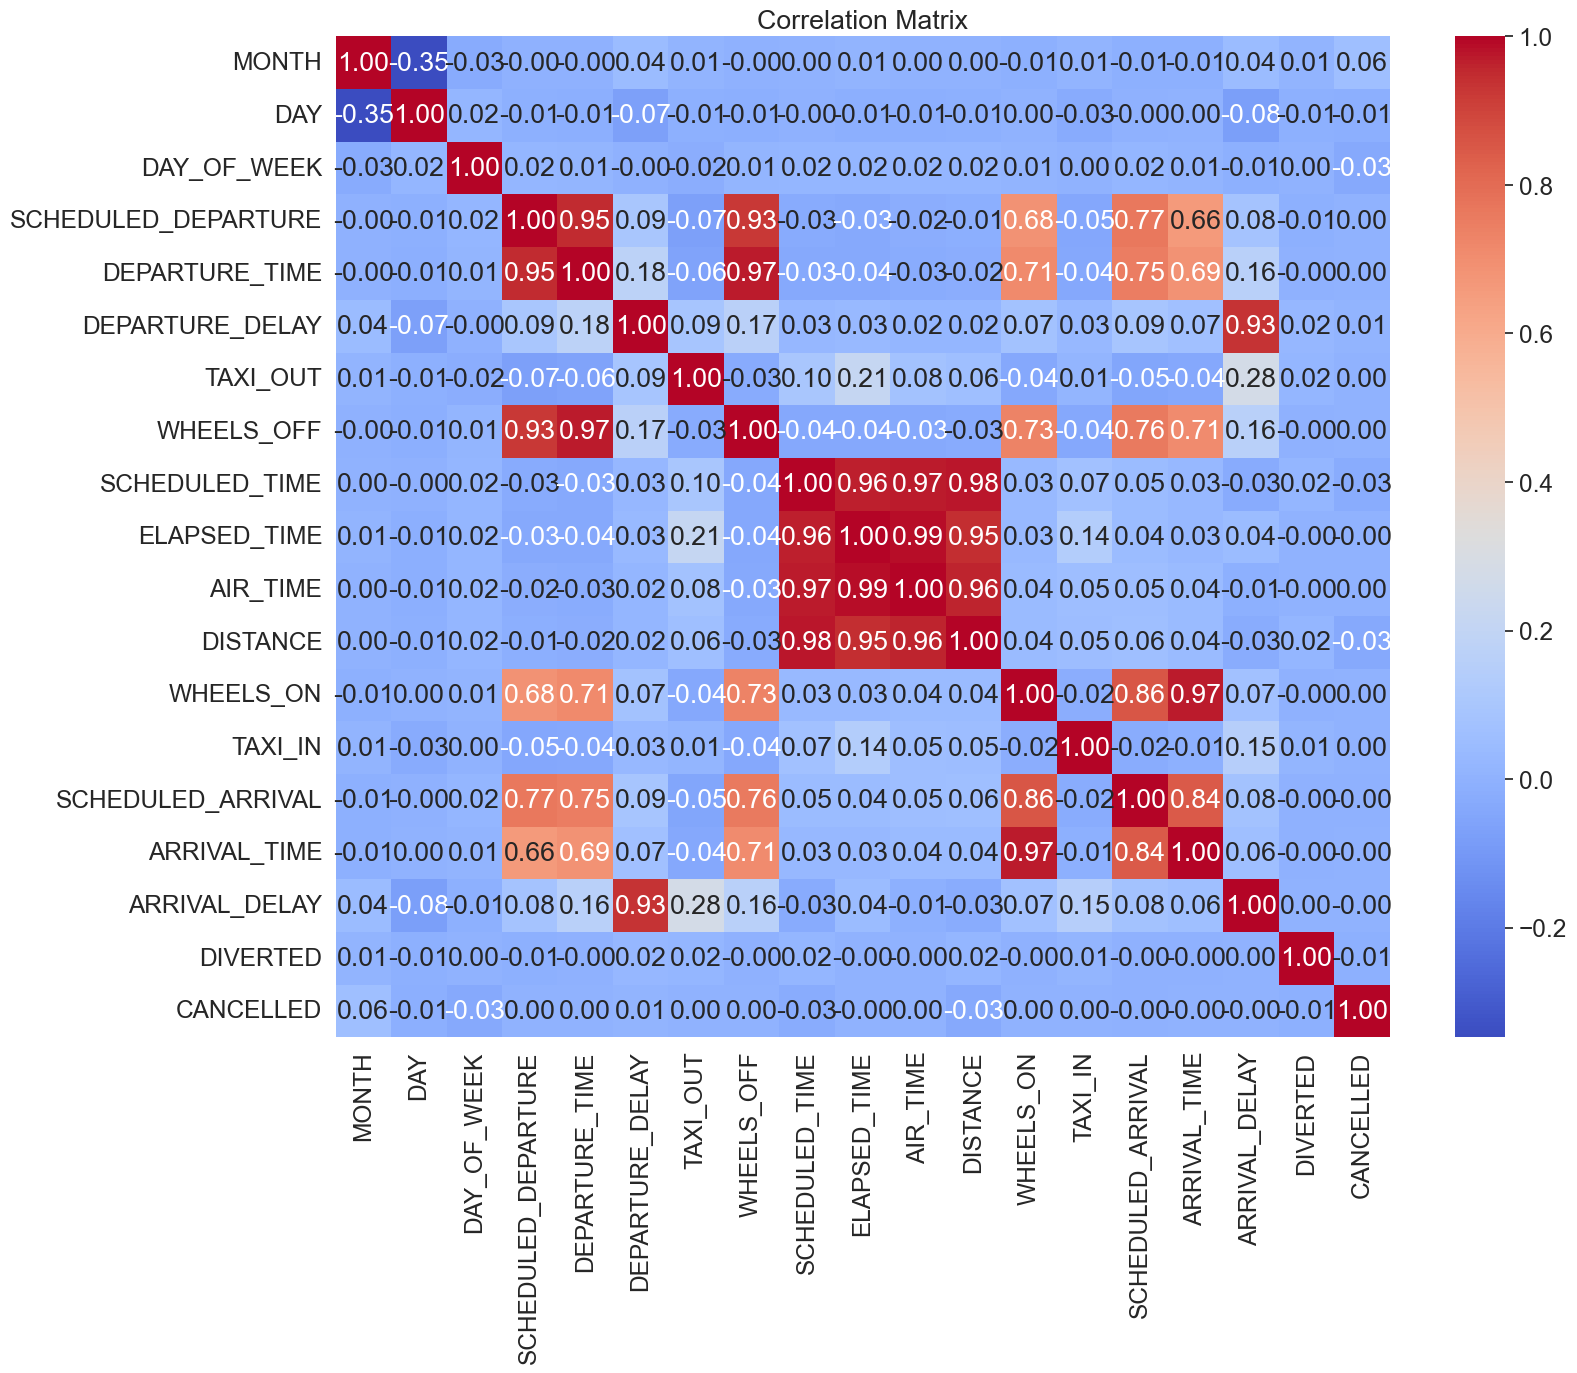

In [45]:
# Explore Correlations

correlation_matrix = df.corr()
plt.figure(figsize=(17, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### 
There is high correlation between arrival delay and departure delay

It shows that maximum of the arrival delays are due to the departure delays.

### DATA PREPROCESSING & DATA CLEANING

In [46]:
df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON
0,1,1,4,Alaska Airlines Inc.,ANC,SEA,5,2354.0,-11.0,21.0,...,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,B
1,1,1,4,American Airlines Inc.,LAX,PBI,10,2.0,-8.0,12.0,...,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,B
2,1,1,4,US Airways Inc.,SFO,CLT,20,18.0,-2.0,16.0,...,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,B
3,1,1,4,American Airlines Inc.,LAX,MIA,20,15.0,-5.0,15.0,...,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,B
4,1,1,4,Alaska Airlines Inc.,SEA,ANC,25,24.0,-1.0,11.0,...,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,B


### Binary Classsification
As we mentioned at the beginning of this document, this is a binary classification, which means that we will run our models with the target being a column that we will engineer called FLIGHT_STATUS. In this column there will be only two values (hence the name binary), a 0 for flights that arrive either earlier or on time, and a 1 for flights that are delayed.

In [47]:
status = []

for value in df['DEPARTURE_DELAY']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status
df.head()   

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,...,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,FLIGHT_STATUS
0,1,1,4,Alaska Airlines Inc.,ANC,SEA,5,2354.0,-11.0,21.0,...,1448,404.0,4.0,430,408.0,-22.0,0,0,B,0
1,1,1,4,American Airlines Inc.,LAX,PBI,10,2.0,-8.0,12.0,...,2330,737.0,4.0,750,741.0,-9.0,0,0,B,0
2,1,1,4,US Airways Inc.,SFO,CLT,20,18.0,-2.0,16.0,...,2296,800.0,11.0,806,811.0,5.0,0,0,B,0
3,1,1,4,American Airlines Inc.,LAX,MIA,20,15.0,-5.0,15.0,...,2342,748.0,8.0,805,756.0,-9.0,0,0,B,0
4,1,1,4,Alaska Airlines Inc.,SEA,ANC,25,24.0,-1.0,11.0,...,1448,254.0,5.0,320,259.0,-21.0,0,0,B,0


In [48]:
df.FLIGHT_STATUS.value_counts(normalize=True)

0    0.5125
1    0.4875
Name: FLIGHT_STATUS, dtype: float64

### 
This means that 51% of the flights have no delays, but it can be that they arrived either early or on time, and 49% of the flights were delayed.

However, as I mentioned above, there might be some other feature engineering to be done for the visualizations that we will do or even some additional column dropping, as there are a few that we cannot see affecting the modeling in any way.

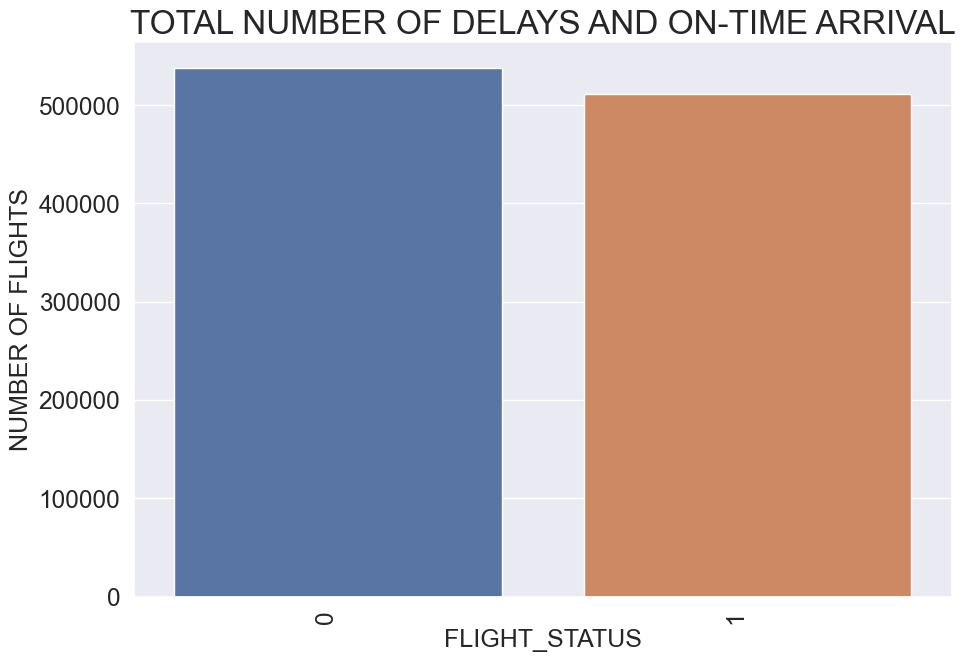

In [49]:
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['FLIGHT_STATUS'], data=df, order=df['FLIGHT_STATUS'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF DELAYS AND ON-TIME ARRIVAL', fontsize=24)
plt.xlabel('FLIGHT_STATUS', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [50]:
df.drop(['CANCELLED', 'DIVERTED', 'CANCELLATION_REASON', ],axis=1, inplace=True)

In [51]:
df.drop(['DAY','SCHEDULED_DEPARTURE', 'DISTANCE', 'TAXI_OUT', 'WHEELS_OFF', 'TAXI_IN', 'WHEELS_ON', 'DEPARTURE_DELAY', 'DISTANCE'],axis=1, inplace=True)

In [52]:
# Encoding Categorical Variables

cat_feat = (df.dtypes == "object")
cat_feat = list(cat_feat[cat_feat].index)

encoder = LabelEncoder()
for i in cat_feat:
    df[i] = df[[i]].apply(encoder.fit_transform)

In [53]:
Y = df.pop('FLIGHT_STATUS')

In [54]:
# Normalize/Scaling Dataset

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df,columns=df.columns)

In [55]:
scaled_df

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,0.0,0.500000,0.000000,0.047771,0.863057,0.980825,0.265043,0.238349,0.238235,0.181934,0.169654,0.029226
1,0.0,0.500000,0.076923,0.544586,0.729299,0.000417,0.372493,0.351531,0.376471,0.317642,0.308462,0.035558
2,0.0,0.500000,0.846154,0.866242,0.203822,0.007086,0.381089,0.370173,0.380882,0.341391,0.337641,0.042377
3,0.0,0.500000,0.076923,0.544586,0.630573,0.005836,0.379656,0.354194,0.369118,0.340967,0.314714,0.035558
4,0.0,0.500000,0.000000,0.863057,0.047771,0.009587,0.308023,0.266312,0.282353,0.135284,0.107545,0.029713
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.0,0.166667,0.230769,0.799363,0.328025,0.418508,0.108883,0.097204,0.083824,0.486853,0.471863,0.032148
1048571,1.0,0.166667,0.923077,0.563694,0.464968,0.418508,0.349570,0.339547,0.311765,0.566582,0.556065,0.038967
1048572,1.0,0.166667,0.923077,0.834395,0.707006,0.420592,0.330946,0.322237,0.313235,0.688295,0.677782,0.041403
1048573,1.0,0.166667,0.230769,0.675159,0.707006,0.417674,0.184814,0.174434,0.176471,0.526293,0.511880,0.033609


### Build Machine Learning Model

In [56]:
# Split the dataset into training and testing sets – x = questions while y = answers

X_train, X_test, Y_train, Y_test = train_test_split(scaled_df, Y, test_size=0.2, random_state=42)

In [57]:
# Model Building
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(Y_test, ly_pred))
print("Precision:", precision_score(Y_test, ly_pred))
print("Recall:", recall_score(Y_test, ly_pred))
print("F1-score:", f1_score(Y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(Y_test, ly_pred))

Logistic Regression
Accuracy: 0.8220728131034976
Precision: 0.8875070390472425
Recall: 0.7262228061059423
F1-score: 0.7988051460676581
AUC-ROC: 0.8195292054221642


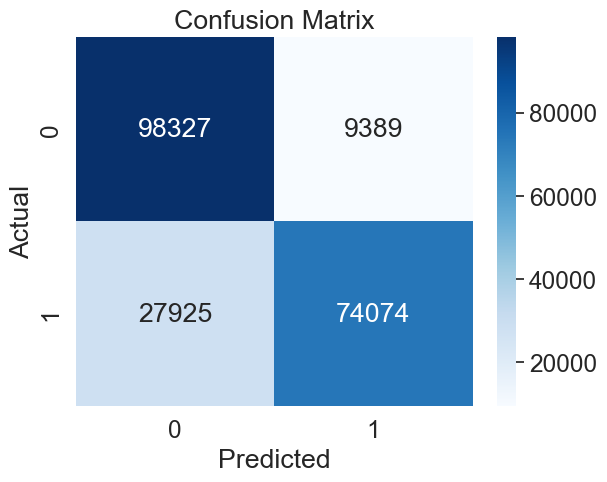

In [58]:
# Create a confusion matrix

lcm = confusion_matrix(Y_test, ly_pred)

# Visualize the confusion matrix

sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
from sklearn.metrics import classification_report

# Print the classification report - Logistic Regression

print(classification_report(Y_test, ly_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84    107716
           1       0.89      0.73      0.80    101999

    accuracy                           0.82    209715
   macro avg       0.83      0.82      0.82    209715
weighted avg       0.83      0.82      0.82    209715



In [60]:
# Model Building

# Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfy_pred = rfc.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(Y_test, rfy_pred))
print("Precision:", precision_score(Y_test, rfy_pred))
print("Recall:", recall_score(Y_test, rfy_pred))
print("F1-score:", f1_score(Y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(Y_test, rfy_pred))

Random Forest
Accuracy: 0.9077462270223875
Precision: 0.9358639019554075
Recall: 0.8699399013715821
F1-score: 0.9016985666597228
AUC-ROC: 0.9067429463410326


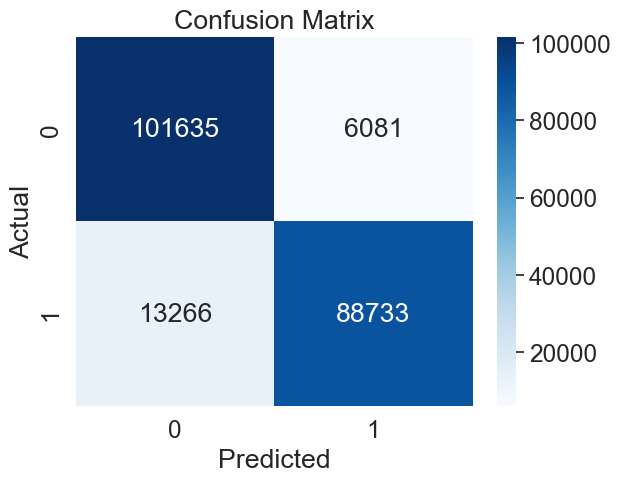

In [61]:
# Create a confusion matrix

rcm = confusion_matrix(Y_test, rfy_pred)

# Visualize the confusion matrix

sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [62]:
# Print the classification report - Random Forest
print(classification_report(Y_test, rfy_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91    107716
           1       0.94      0.87      0.90    101999

    accuracy                           0.91    209715
   macro avg       0.91      0.91      0.91    209715
weighted avg       0.91      0.91      0.91    209715



In [63]:
# Model Building

# Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dty_pred = dtc.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(Y_test, dty_pred))
print("Precision:", precision_score(Y_test, dty_pred))
print("Recall:", recall_score(Y_test, dty_pred))
print("F1-score:", f1_score(Y_test, dty_pred))
print("AUC-ROC:", roc_auc_score(Y_test, dty_pred))

Decision Tree
Accuracy: 0.9409341248837708
Precision: 0.9392572840280773
Recall: 0.939303326503201
F1-score: 0.9392803047014014
AUC-ROC: 0.9408908477738628


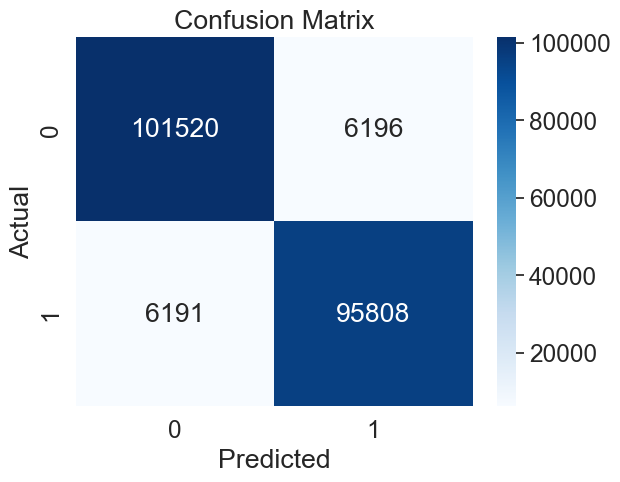

In [64]:
# Create a confusion matrix

dcm = confusion_matrix(Y_test, dty_pred)

# Visualize the confusion matrix

sns.heatmap(dcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [65]:
# Print the classification report
print(classification_report(Y_test, dty_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    107716
           1       0.94      0.94      0.94    101999

    accuracy                           0.94    209715
   macro avg       0.94      0.94      0.94    209715
weighted avg       0.94      0.94      0.94    209715



In [66]:
# Model Building

# Decision Tree Classifier

xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgby_pred = dtc.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(Y_test, xgby_pred))
print("Precision:", precision_score(Y_test, xgby_pred))
print("Recall:", recall_score(Y_test, xgby_pred))
print("F1-score:", f1_score(Y_test, xgby_pred))
print("AUC-ROC:", roc_auc_score(Y_test, xgby_pred))

Decision Tree
Accuracy: 0.9409341248837708
Precision: 0.9392572840280773
Recall: 0.939303326503201
F1-score: 0.9392803047014014
AUC-ROC: 0.9408908477738628


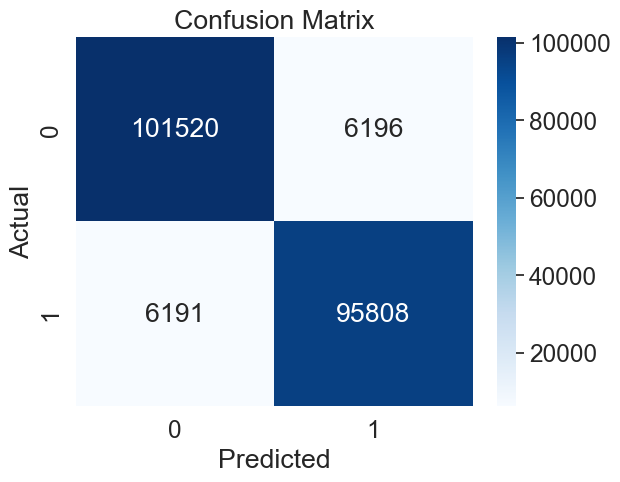

In [67]:
# Create a confusion matrix

xgb = confusion_matrix(Y_test, xgby_pred)

# Visualize the confusion matrix

sns.heatmap(xgb, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [68]:
# Print the classification report
print(classification_report(Y_test, xgby_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    107716
           1       0.94      0.94      0.94    101999

    accuracy                           0.94    209715
   macro avg       0.94      0.94      0.94    209715
weighted avg       0.94      0.94      0.94    209715



In [69]:
# 8 Machine learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random forest'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), "Naive Bayes"],
               [DecisionTreeClassifier(random_state = 42), "Decision tree"],
               [LogisticRegression(), 'Logistics Regression']
              ]

## acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, Y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(Y_test, pred)
    p_score = precision_score(Y_test, pred)
    r_score = recall_score(Y_test, pred)
    roc_score = roc_auc_score(Y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {
    'XGBClassifier' : XGBClassifier(),
    'DecisionTreeCLassifier' : DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier()
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)

    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)


XGBClassifier:
Accuracy = 0.94

              precision    recall  f1-score   support

           0       0.91      0.98      0.94    107716
           1       0.97      0.90      0.94    101999

    accuracy                           0.94    209715
   macro avg       0.94      0.94      0.94    209715
weighted avg       0.94      0.94      0.94    209715

DecisionTreeCLassifier:
Accuracy = 0.94

              precision    recall  f1-score   support

           0       0.94      0.94      0.94    107716
           1       0.94      0.94      0.94    101999

    accuracy                           0.94    209715
   macro avg       0.94      0.94      0.94    209715
weighted avg       0.94      0.94      0.94    209715

RandomForestClassifier:
Accuracy = 0.91

              precision    recall  f1-score   support

           0       0.89      0.95      0.91    107716
           1       0.94      0.87      0.90    101999

    accuracy                           0.91    209715
   macro avg  

In [71]:
from sklearn.metrics import r2_score

# Assuming Y_test and Y_pred are your true and predicted values
# Replace Y_test and Y_pred with your actual variables

r_squared = r2_score(Y_test, Y_pred)

print(f'R-squared: {r_squared:.4f}')

R-squared: 0.2796


In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_test and y_pred are your true and predicted values
# Replace y_test and y_pred with your actual variables

print('MAE:', mean_absolute_error(Y_test, Y_pred))
print('MSE:', mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

MAE: 0.17996328350380278
MSE: 0.17996328350380278
RMSE: 0.4242207956993655


### Phase 3 Hyper Parameter 0ptimization
hyperparameter optimization is the art and science of improving our model's performances
we will be implementing and optimizing a GradientBoostingRegressor model

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, Y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")


# measuring performance on test set
print ("Applying best model on test data:")
best_mod = gridsearch.best_estimator_
pred = best_mod.predict(X_test)

Best parameter combination: {'learning_rate': 1.0, 'n_estimators': 150} 

Applying best model on test data:


### Productionizing Our Model
This is the last stage of the machine learning pipeline, and the main aim here points to how the users use and consume the model. There are a lot of ways a ML model can be used.

- It can be embedded into an application to be used by users online via an API on web interfaces or on mobile devices.
- It can be used to create reports or dashboards that will be used by the organization to make key business decisions.
- It can be consumed via streaming or batch methods.
- In this scenario, we will simulate the use of the model on a new dataset and use it to make relevant predictions.

In [81]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = './optimized_mod.pkl'
joblib.dump(best_mod, filename)

['./optimized_mod.pkl']

### Steps for Machine Learning:

The project involved implementing several machine learning algorithms, including Logistic Regression, Decision Tree Classifier, XGBClassifier, and RandomForestClassifier. Each algorithm was evaluated based on key performance metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

### Key Insights:

The models demonstrated high accuracy across the board, with Decision Tree achieving an impressive accuracy of 94%. XGBClassifier and DecisionTreeClassifier both exhibited 94% accuracy, showcasing their robust predictive capabilities. Random Forest also performed well with an accuracy of 91%.


### Model Evaluation Summary:

- Decision Tree and XGB Classifier are the top-performing models with high accuracy, precision, recall, and AUC-ROC.
- Random Forest also performs well but slightly below Decision Tree and XGB Classifier.
- Logistic Regression and Gradient Boosting Classifier demonstrate moderate performance, with Gradient Boosting Classifier having a trade-off between precision and recall.
- The choice of the best model depends on the specific goals and priorities, considering the balance between false positives and false negatives.

The confusion matrix provides a detailed breakdown of the performance of a classification model. In this context, it helps evaluate how well each machine learning model predicted flight delays. Let's interpret the confusion matrix for the Logistic Regression model as an example:


### Interpretation:

- Decision Tree and XGB Classifier have the highest true positive and true negative counts, indicating strong predictive capabilities.
- Logistic Regression and Gradient Boosting Classifier show a higher rate of false negatives, suggesting room for improvement in capturing instances of flight delays.
- Random Forest strikes a balance between precision and recall, with relatively low false positive and false negative counts.

### Interpretation:

- The high number of true positives and true negatives indicates good predictive performance.
- The false positives (Type I errors) suggest instances where the model wrongly predicted flight delays, leading to potential inconvenience for passengers.
- The false negatives (Type II errors) indicate instances where the model failed to predict flight delays that occurred, potentially impacting operational planning.

Similar interpretations can be made for the confusion matrices of other models. Aiming to minimize false positives and false negatives is crucial, and the choice of a specific model depends on the balance needed between precision and recall, considering the specific goals and constraints of the application.

- R-Square = 0.2796
- MAE = 0.17996
- MSE = 0.17996
- RMSE = 0.42422

## Overall Interpretation:

The R-squared value indicates that the model captures a moderate portion of the variability in flight delay times, but there is room for improvement.
The MAE and MSE values suggest a moderate level of accuracy in predicting flight delay times, with deviations around 0.17996 units on average.

The RMSE provides a sense of the average magnitude of errors and is larger than the MAE, indicating that larger errors contribute more to the overall prediction error.
Further analysis and potential model improvements may be explored to enhance predictive performance and address the remaining variability in flight delay times.

## Recommendations:

- Implement Predictive Maintenance: Airlines should focus on enhancing maintenance procedures to identify and address potential mechanical issues before they lead to delays.

- Optimize Scheduling: Utilize machine learning predictions to optimize flight schedules, considering historical delay patterns and external factors like weather conditions.

- Invest in Advanced Weather Prediction: Improving the accuracy of weather prediction models can help airlines anticipate and plan for adverse conditions, reducing the impact of weather-related delays.

- Continuous Model Improvement: Regularly update and refine machine learning models based on new data and evolving patterns to ensure ongoing accuracy and effectiveness.

In conclusion, leveraging machine learning for flight delay prediction can significantly enhance the efficiency and reliability of air travel, benefiting both airlines and passengers alike.
